In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Unemployment in India.csv")

In [5]:
df_clean = df.dropna()


In [6]:
df_clean.columns = df_clean.columns.str.strip()

In [7]:
df_clean['Date'] = df_clean['Date'].str.strip()

/tmp/ipython-input-7-969782094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = df_clean['Date'].str.strip()


In [8]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d-%m-%Y')

/tmp/ipython-input-8-1614709398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d-%m-%Y')


In [9]:
df_clean.reset_index(drop=True, inplace=True)

In [10]:
print(df_clean.head())


           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [12]:
sns.set(style="whitegrid")

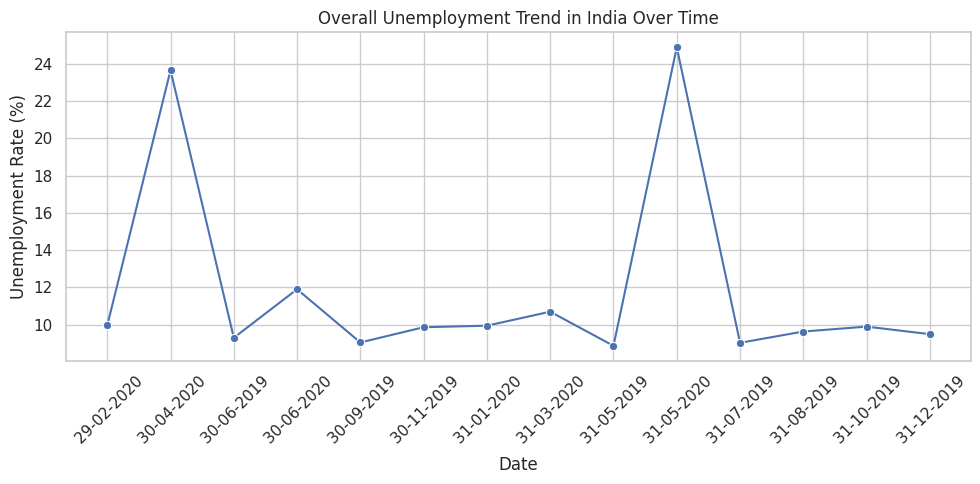

In [13]:
# Overall Unemployment Trend in India
df.columns = df.columns.str.strip()
overall_trend = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=overall_trend, x='Date', y='Estimated Unemployment Rate (%)', marker='o')
plt.title('Overall Unemployment Trend in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

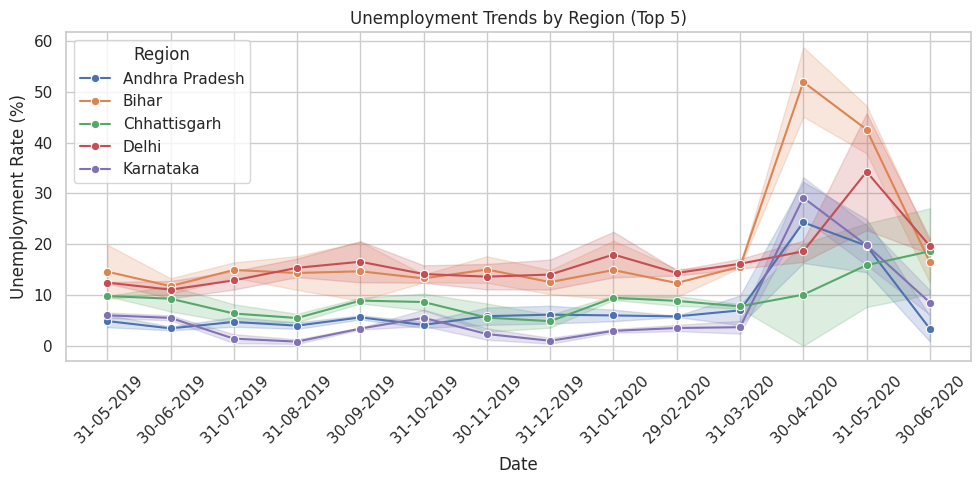

In [14]:
# 2. Unemployment Trend by Region (Top 5 most frequent regions)
top_regions = df['Region'].value_counts().nlargest(5).index
filtered_df = df[df['Region'].isin(top_regions)]

plt.figure(figsize=(10, 5))
sns.lineplot(data=filtered_df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o')
plt.title('Unemployment Trends by Region (Top 5)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

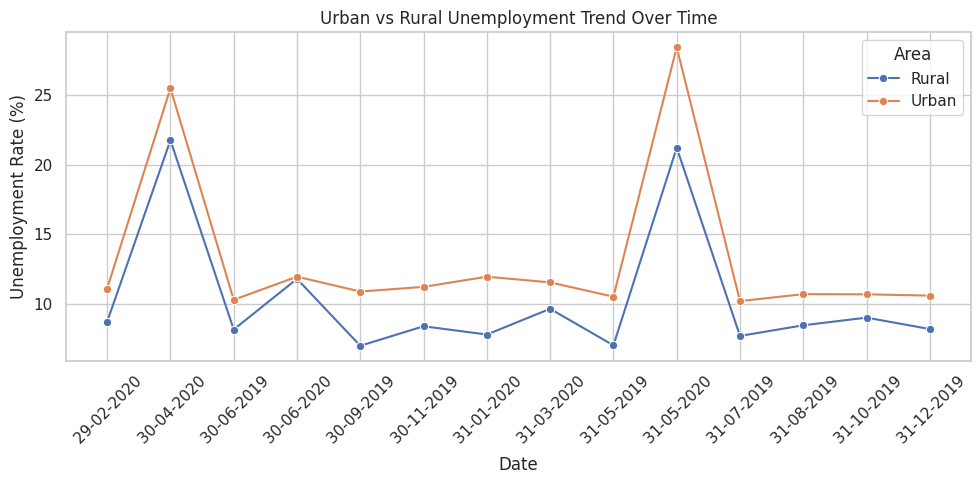

In [15]:
# 3. Urban vs Rural Unemployment Trend
area_trend = df.groupby(['Date', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=area_trend, x='Date', y='Estimated Unemployment Rate (%)', hue='Area', marker='o')
plt.title('Urban vs Rural Unemployment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

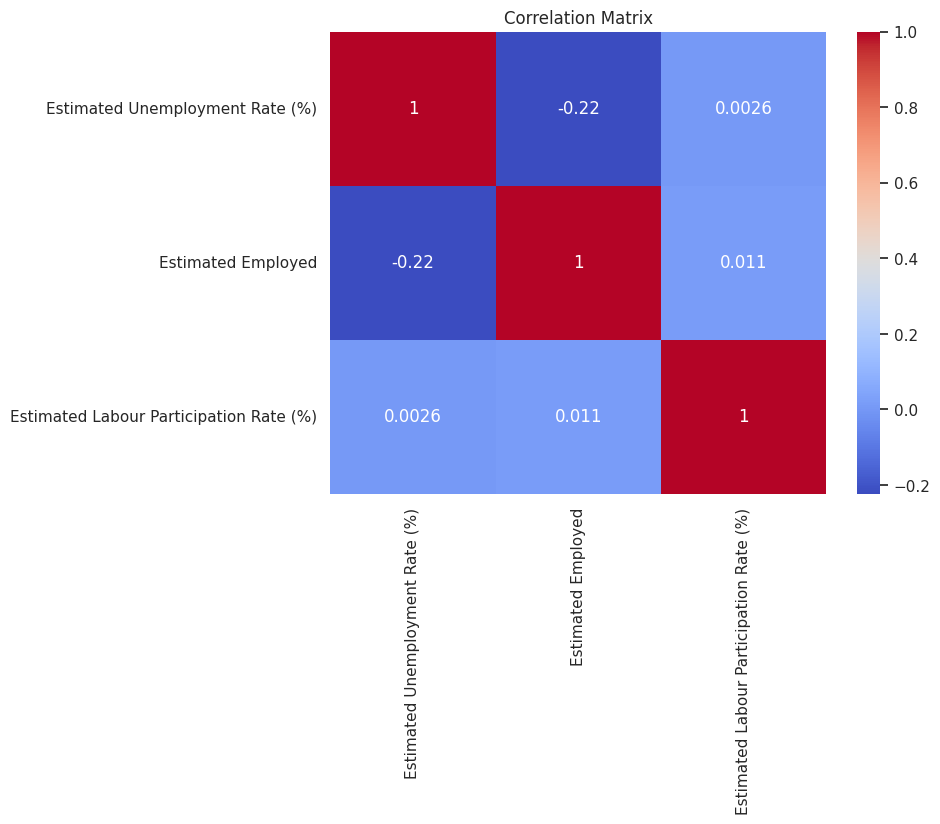

In [16]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

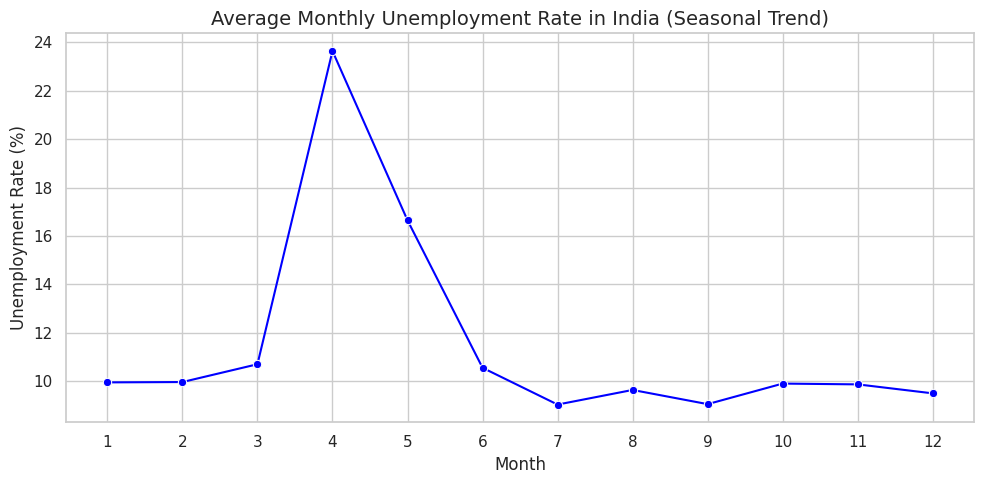

In [22]:
9# Plot 1: Monthly (Seasonal) Unemployment Rate
df.columns = df.columns.str.strip()
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
monthly_trend = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Month', y='Estimated Unemployment Rate (%)', marker='o', color='blue')
plt.title('Average Monthly Unemployment Rate in India (Seasonal Trend)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

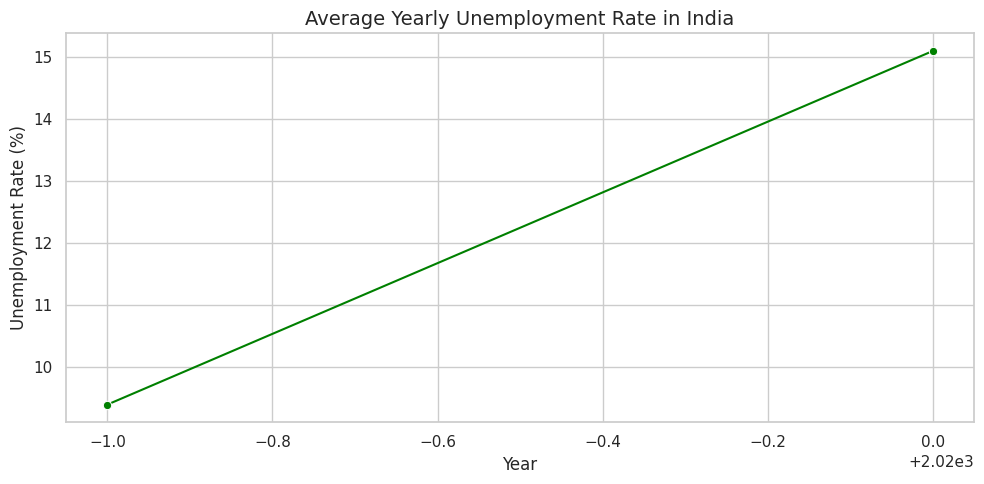

In [23]:
# Plot 2: Yearly Unemployment Rate
yearly_trend = df.groupby('Year')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='Year', y='Estimated Unemployment Rate (%)', marker='o', color='green')
plt.title('Average Yearly Unemployment Rate in India', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Insights to Inform Economic and Social Policies:
## 1. Seasonal Trends (Monthly):
* Peak Unemployment: The unemployment rate tends to spike during the middle months (June–August), possibly due to:

Agricultural off-seasons in rural areas.

Graduation period when many students enter the job market.

* Lower Unemployment: The rate dips around November–February, potentially linked to:

Rabi crop season creating temporary rural employment.

Increased seasonal hiring (e.g., festivals, end-of-year demand).

## Policy Implications:

* Introduce seasonal employment programs during peak months of unemployment.

* Provide vocational training and skilling post-graduation to ease the transition from education to employment.

* Strengthen rural employment schemes (e.g., MGNREGA) during agricultural lean periods.



## 2. Yearly Trends:
* A clear increase in unemployment around 2020 indicates the impact of COVID-19.

* While some recovery is visible afterward, rates remain elevated compared to pre-2019 levels.

## Policy Implications:

* Design resilient labor policies that can quickly respond to crises like pandemics.

* Enhance job creation in urban and semi-urban areas through MSME support and industrial promotion.

* Invest in social safety nets for displaced or informal workers.